# MAP654I: Practical Introduction to Machine Learning  
## Practical Session 1: Unsupervised Learning
### <span style="color:orange;">*Temperature dataset* 🔥

#### Importing libraries

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### Loading data

In [2]:
x1 = np.load("temper.npz") #load the data

#### Data exploration

In [13]:
x1.files 

['villes', 'data', 'varname']

In [14]:
# Load the data matrix, cities, and variable names from the dataset
data_matrix = x1['data']      # Contains the main data
villes = x1['villes']         # List of cities
varname = x1['varname']       # Names of the variables/columns

# Extract the temperature matrix (first 12 columns)
temperature_matrix = data_matrix[:, :12]

# Display the extracted temperature matrix
print("Matrice des températures (15x14) :")
print(temperature_matrix)

# Display the list of cities
print("\nListe des villes :")
print(villes)

# Display the names of the variables/columns
print("\nNoms des variables/colonnes :")
print(varname)

Matrice des températures (15x14) :
[[ 5.6  6.6 10.3 12.8 15.8 19.3 20.9 21.  18.6 13.8  9.1  6.2]
 [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]
 [ 2.6  3.7  7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2  6.6  3.6]
 [ 1.5  3.2  7.7 10.6 14.5 17.8 20.1 19.5 16.7 11.4  6.5  2.3]
 [ 2.4  2.9  6.   8.9 12.4 15.3 17.1 17.1 14.7 10.4  6.1  3.5]
 [ 2.1  3.3  7.7 10.9 14.9 18.5 20.7 20.1 16.9 11.4  6.7  3.1]
 [ 5.5  6.6 10.  13.  16.8 20.8 23.3 22.8 19.9 15.  10.2  6.9]
 [ 5.6  6.7  9.9 12.8 16.2 20.1 22.7 22.3 19.3 14.6 10.   6.5]
 [ 5.   5.3  8.4 10.8 13.9 17.2 18.8 18.6 16.4 12.2  8.2  5.5]
 [ 7.5  8.5 10.8 13.3 16.7 20.1 22.7 22.5 20.3 16.  11.5  8.2]
 [ 3.4  4.1  7.6 10.7 14.3 17.5 19.1 18.7 16.  11.4  7.1  4.3]
 [ 4.8  5.3  7.9 10.1 13.1 16.2 17.9 17.8 15.7 11.6  7.8  5.4]
 [ 0.4  1.5  5.6  9.8 14.  17.2 19.  18.3 15.1  9.5  4.9  1.3]
 [ 4.7  5.6  9.2 11.6 14.9 18.7 20.9 20.9 18.3 13.3  8.6  5.5]
 [ 2.4  3.4  7.1  9.9 13.6 17.1 19.3 18.8 16.  11.   6.6  3.4]]

Liste des villes :

#### Monthly Average Temperature Calculation and Visualization

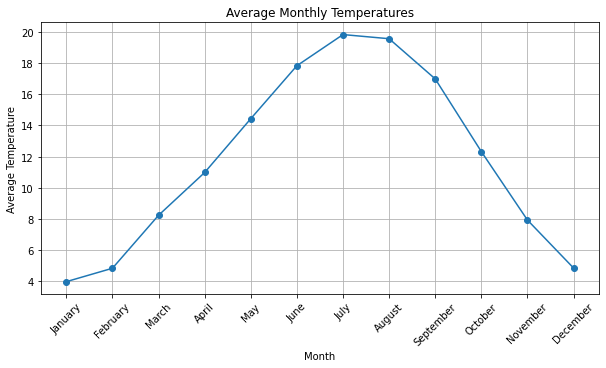

In [15]:
# Calculate the averages for each month
mean_temperatures = np.mean(temperature_matrix, axis=0)

# Visualize the averages with plt.plot
plt.figure(figsize=(10, 5))
plt.plot(mean_temperatures, marker='o')
plt.title('Average Monthly Temperatures')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(ticks=np.arange(12), labels=x1['varname'][:12], rotation=45)
plt.grid(True)
plt.show()

This code snippet calculates and visualizes the average monthly temperatures using data from the `temperature_matrix`. The plot shows that higher temperatures are observed in the summer months (June, July, and August) and lower temperatures in the winter months (December, January, and February). 

#### Temperature Curves Plotting for Each City

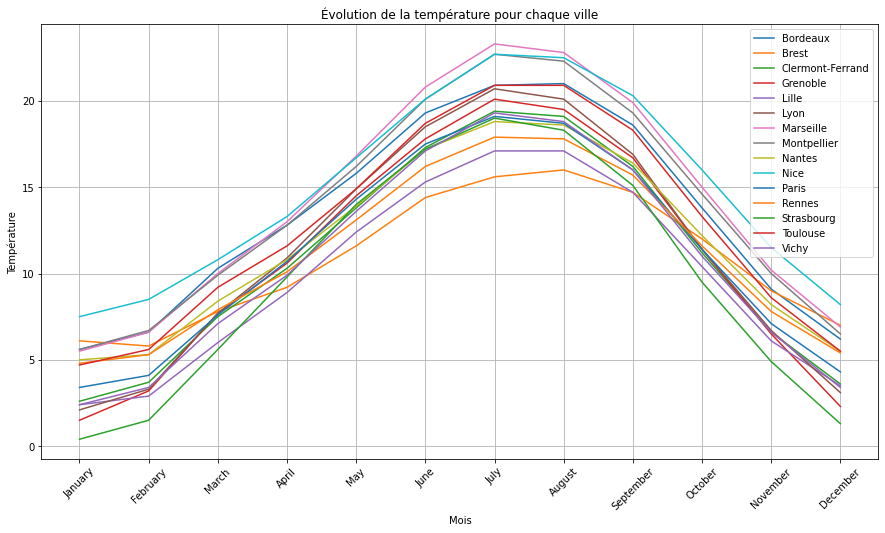

In [6]:
# Plot the temperature curves for each city
plt.figure(figsize=(15, 8))
for i in range(temperature_matrix.shape[0]):
    plt.plot(temperature_matrix[i], label=villes[i])

plt.title("Temperature Variation for Each City")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.xticks(ticks=np.arange(12), labels=x1['varname'][:12], rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

The graph displays the monthly temperature variations for different cities in France over the course of a year. Most cities show a similar trend, with temperatures increasing from January to July, peaking in the summer months, and then gradually decreasing towards December.

Overall, this graph provides a clear visual comparison of the temperature trends for different cities, highlighting both common patterns and unique characteristics of each location throughout the year.

#### Extracting and Plotting City Positions

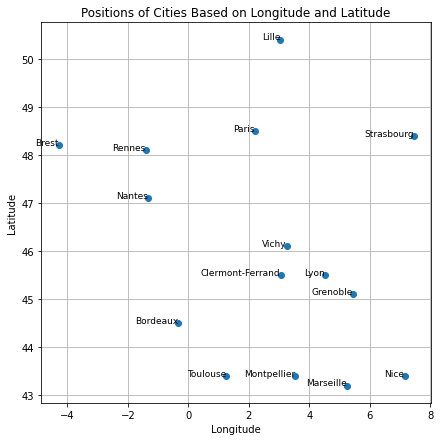

In [19]:
# Extract the latitude and longitude columns
latitude = x1['data'][:, 12]
longitude = x1['data'][:, 13]

# Extract the list of cities
cities = x1['villes']

# Plot the positions of the cities
plt.figure(figsize=(7, 7))
plt.scatter(longitude, latitude, marker='o')

# Annotate each point with the city name
for i, city in enumerate(cities):
    plt.text(longitude[i], latitude[i], city, fontsize=9, ha='right')

plt.title("Positions of Cities Based on Longitude and Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

#### K-means clustering 

##### Elbow method for determining the optimum number of clusters

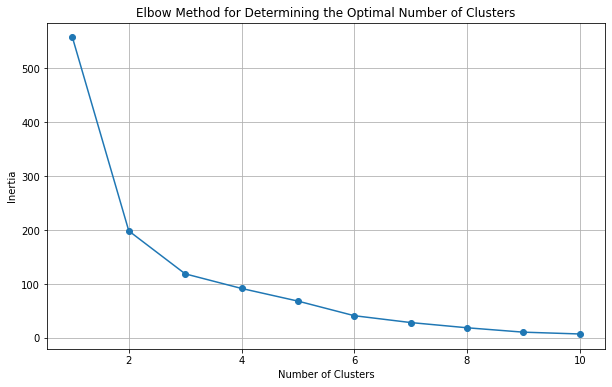

In [20]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(temperature_matrix)
    inertias.append(kmeans.inertia_)

# Plot the inertia curve as a function of the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Determining the Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

We observe that the elbow occurs at \( k = 2 \), where the inertia value begins to decline at a slower pace. However, at \( k = 3 \), the inertia value continues to decrease at a notable rate. Consequently, both \( k = 2 \) and \( k = 3 \) can be considered for analysis and comparison of the results.

#### Training the K-means model

##### *k_optimal = 2*

Here, we will train the K-means model with \( k = 2 \) and visualize the clusters. The algorithm is trained based on the temperature data for each city.

In [27]:
# Choose the number of clusters
k_optimal = 2

# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=42) # random_state=42 for reproducibility
clusters = kmeans.fit_predict(temperature_matrix)

#### Cluster display by longitude and latitude

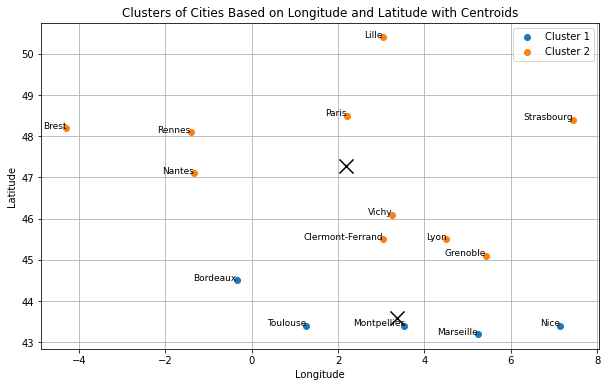

In [28]:
# Calculate the centroids using the average latitudes and longitudes of the clusters
centroids = np.zeros((k_optimal, 2))
for cluster in range(k_optimal):
    centroids[cluster, 0] = np.mean(longitude[clusters == cluster])
    centroids[cluster, 1] = np.mean(latitude[clusters == cluster])

# Visualize the clusters based on longitude and latitude
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.scatter(longitude[clusters == cluster], latitude[clusters == cluster], label=f'Cluster {cluster + 1}', cmap='tab10', vmax=9)
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], marker='x', s=200, c='black')  # Display the centroids

# Annotate each point with the city name
for i, city in enumerate(cities):
    plt.text(longitude[i], latitude[i], city, fontsize=9, ha='right')

plt.title("Clusters of Cities Based on Longitude and Latitude with Centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()


##### Display the average temperature curve for each cluster 

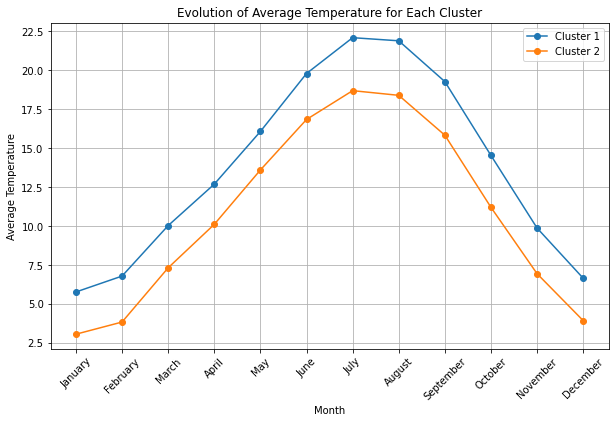

In [23]:
# Calculate the average temperature for each cluster
average_temperatures_per_cluster = np.zeros((k_optimal, temperature_matrix.shape[1]))

for cluster in range(k_optimal):
    average_temperatures_per_cluster[cluster] = np.mean(temperature_matrix[clusters == cluster], axis=0)

# Plot the average temperature evolution for each cluster
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.plot(average_temperatures_per_cluster[cluster], marker='o', label=f'Cluster {cluster + 1}')

plt.title("Evolution of Average Temperature for Each Cluster")
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.xticks(ticks=np.arange(12), labels=varname[:12], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

We can observe that the two clusters exhibit distinct temperature patterns throughout the year. Cluster 1 represents cities with higher average temperatures, while Cluster 2 includes cities with lower average temperatures. The temperature curves for each cluster provide a clear visual representation of the differences in temperature trends between the two groups of cities.

##### *k_optimal = 3*

Here, we will train the K-means model with \( k = 3 \) and visualize the clusters. The algorithm is trained based on the temperature data for each city.

In [30]:
# Choix du nombre de clusters
k_optimal = 3

# Appliquer l'algorithme KMeans
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(temperature_matrix)

##### Cluster display by longitude and latitude

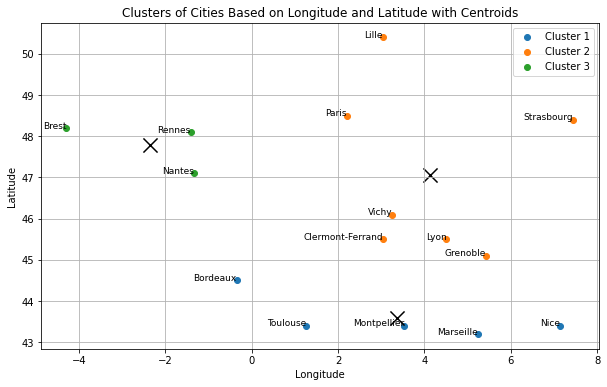

In [31]:
# Calculate the centroids using the average latitudes and longitudes of the clusters
centroids = np.zeros((k_optimal, 2))
for cluster in range(k_optimal):
    centroids[cluster, 0] = np.mean(longitude[clusters == cluster])
    centroids[cluster, 1] = np.mean(latitude[clusters == cluster])

# Visualize the clusters based on longitude and latitude
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.scatter(longitude[clusters == cluster], latitude[clusters == cluster], label=f'Cluster {cluster + 1}', cmap='tab10', vmax=9)
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], marker='x', s=200, c='black')  # Display the centroids

# Annotate each point with the city name
for i, city in enumerate(cities):
    plt.text(longitude[i], latitude[i], city, fontsize=9, ha='right')

plt.title("Clusters of Cities Based on Longitude and Latitude with Centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

While training the K-means on the temperature data for each city, we observe that the samples are clustered by their geographical positions. So, the clustering recover a geographical similarity between the cities because each region has a specific temperature range and climate patterns are largely influenced by geographic location. For example, cities within the same region or with similar geographical characteristics (such as proximity to the coast, altitude, or latitude) tend to experience comparable temperature variations throughout the year.

##### Display the average temperature curve for each cluster 

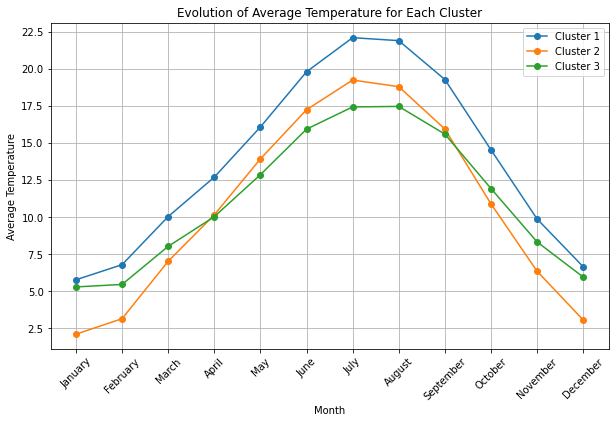

In [32]:
# Calculate the average temperature for each cluster
average_temperatures_per_cluster = np.zeros((k_optimal, temperature_matrix.shape[1]))

for cluster in range(k_optimal):
    average_temperatures_per_cluster[cluster] = np.mean(temperature_matrix[clusters == cluster], axis=0)

# Plot the average temperature evolution for each cluster
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.plot(average_temperatures_per_cluster[cluster], marker='o', label=f'Cluster {cluster + 1}')

plt.title("Evolution of Average Temperature for Each Cluster")
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.xticks(ticks=np.arange(12), labels=varname[:12], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**Cluster 1** stands out as having the highest temperatures consistently throughout the year. When comparing **Cluster 2** and **Cluster 3**, distinct differences in temperature patterns emerge. During the summer, **Cluster 2** experiences higher temperatures than **Cluster 3**, with a more pronounced peak, indicating that cities in Cluster 2 generally have warmer summers. However, in the winter, **Cluster 2** has colder temperatures, with the curve dipping below that of **Cluster 3**, suggesting colder winters. This implies that cities in **Cluster 2** experience more extreme seasonal variations, with hot summers and cold winters. In contrast, **Cluster 3** maintains a more moderate temperature profile, with cooler summers and milder winters, showing less seasonal fluctuation overall.

### <span style="color:blue;">*Digits dataset* 🔢

#### Loading data

In [38]:
# Load digits data
digits = np.load("digits.npz")

#### Data exploration

In [40]:
digits.files

['xt', 'yt', 'y', 'x']

In [49]:
# Load xt, yt, y and x from the dataset
xt = digits['xt']
yt = digits['yt']
x2 = digits['x']
y2 = digits['y']


# Perform one simple pre-processing that scales the values between [0, 1]
x2 = x2 / 255

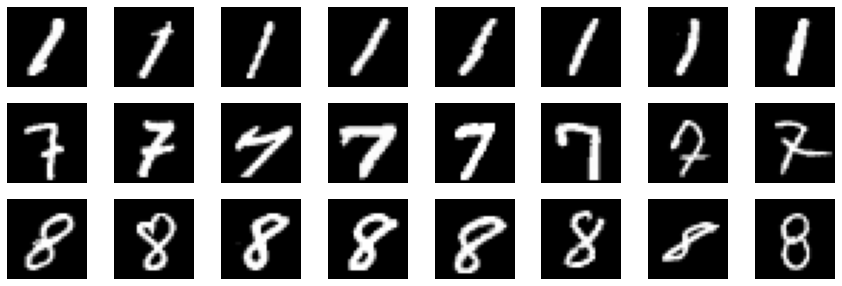

In [53]:
# Set up the figure
plt.figure(figsize=(15, 5))

# Define the number of samples 
samples_per_digit = 8 

# Get the indices for each digit (1, 7, and 8) from y2
indices_1 = np.where(y2 == 1)[0] # np.where returns a tuple with the first element being the indices
indices_7 = np.where(y2 == 7)[0]
indices_8 = np.where(y2 == 8)[0]

# Randomly choose samples from each digit
random_indices_1 = np.random.choice(indices_1, samples_per_digit, replace=False)
random_indices_7 = np.random.choice(indices_7, samples_per_digit, replace=False)
random_indices_8 = np.random.choice(indices_8, samples_per_digit, replace=False)

# Plot the samples, horizontally for each digit
for i in range(samples_per_digit):
    # Plot digit 1 in the first row
    plt.subplot(3, samples_per_digit, i + 1)
    plt.imshow(x2[random_indices_1[i]].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Plot digit 7 in the second row
    plt.subplot(3, samples_per_digit, samples_per_digit + i + 1)
    plt.imshow(x2[random_indices_7[i]].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Plot digit 8 in the third row
    plt.subplot(3, samples_per_digit, 2 * samples_per_digit + i + 1)
    plt.imshow(x2[random_indices_8[i]].reshape(28, 28), cmap='gray')
    plt.axis('off')

# Display the plot
plt.show()

#### K-means clustering

Since we are dealing with 3 labels, so we will set k=3 for the K-means clustering algorithm. But I wanted to show you the elbow method to see how it works.

#### Elbow method for determining the optimum number of clusters

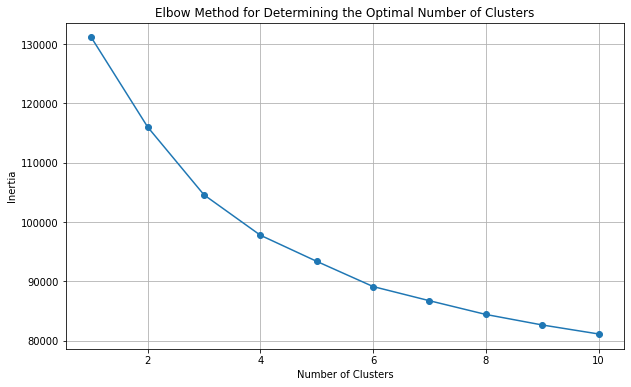

In [57]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x2)
    inertias.append(kmeans.inertia_)

# Plot the inertia curve as a function of the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Determining the Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

We can't see a clear elbow in the plot, but we can observe that the inertia value decreases more rapidly when the number of clusters increases from 2 to 3. This suggests that the optimal number of clusters may be 3, as it leads to a significant reduction in inertia compared to the case of 2 clusters.

##### *k_optimal = 3*

In [58]:
# Choose the number of clusters
k_optimal = 3

# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=42) # random_state=42 for reproducibility
clusters = kmeans.fit_predict(x2)

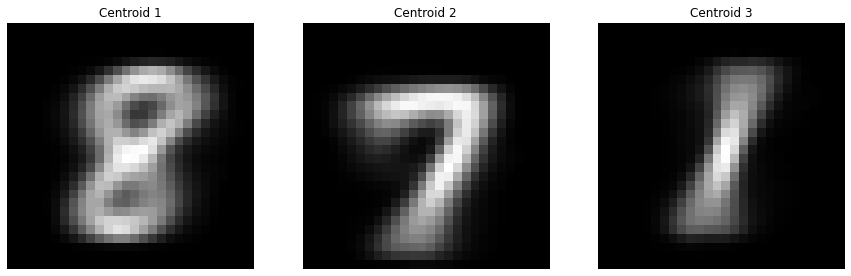

In [59]:
# Store the clusters centroids
centroids = kmeans.cluster_centers_

# Plot the centroids images corresponding to each cluster
plt.figure(figsize=(15, 5))
for i, centroid in enumerate(centroids):
    plt.subplot(1, k_optimal, i + 1)
    plt.imshow(centroid.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Centroid {i + 1}')

We can observe that the K-means algorithm successfully clusters the digits into 3 distinct groups. And samples are clustered by class on digits. The algorithm is trained based on the pixel values of the images and showed a good performance in separating the digits into different clusters.

Clusters centroids doesn't represent any digit because they are the average of the pixel values of the images in each cluster. So, while plotting the centroids, we can recognize the shape of the digits, but they doesn't represent any true image.

##### *k_optimal = 2*

In [60]:
# Choose the number of clusters
k_optimal = 2

# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=42) # random_state=42 for reproducibility
clusters = kmeans.fit_predict(x2)

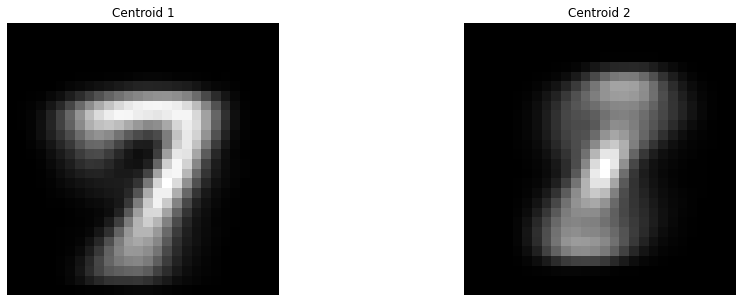

In [61]:
# Store the clusters centroids
centroids = kmeans.cluster_centers_

# Plot the centroids images corresponding to each cluster
plt.figure(figsize=(15, 5))
for i, centroid in enumerate(centroids):
    plt.subplot(1, k_optimal, i + 1)
    plt.imshow(centroid.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Centroid {i + 1}')

Here, the k-means algorithm is trained with k=2 and supposed that digits corresponding to 1 and 8 are in the same cluster.

##### *k_optimal = 4*

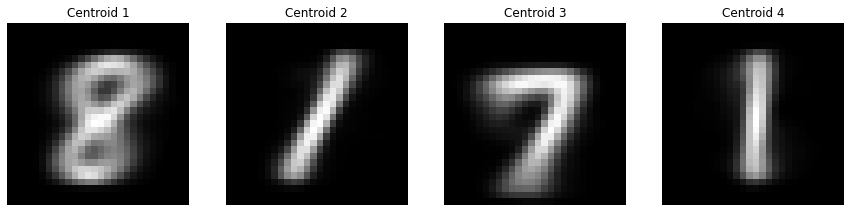

In [63]:
# Choose the number of clusters
k_optimal = 4

# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=42) # random_state=42 for reproducibility
clusters = kmeans.fit_predict(x2)

# Store the clusters centroids
centroids = kmeans.cluster_centers_

# Plot the centroids images corresponding to each cluster
plt.figure(figsize=(15, 5))
for i, centroid in enumerate(centroids):
    plt.subplot(1, k_optimal, i + 1)
    plt.imshow(centroid.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Centroid {i + 1}')

Here, the k-means algorithm is trained with k=4 and supposed that there are 2 clusters for digits corresponding to 1. So, it's obvious that the best number of clusters is 3 where each cluster corresponds to a digit class.

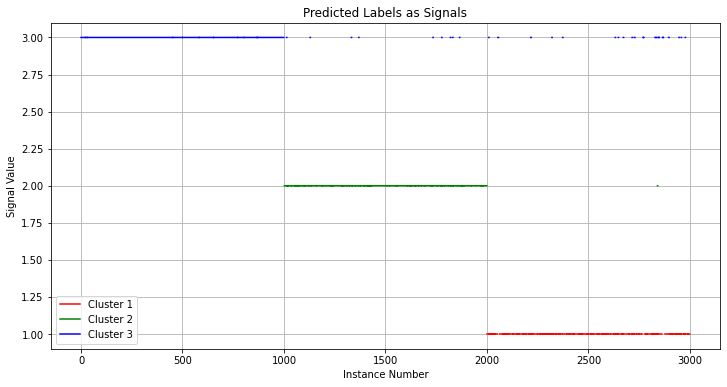

In [76]:
# Train K-means model (assuming 3 clusters for digits 1, 7, and 8)
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(x2)

# Create a signal array
signal_length = len(predicted_labels)
signal = np.zeros(signal_length)

# Assign values to the signal based on cluster membership
for i in range(signal_length):
    signal[i] = predicted_labels[i] + 1  # Add 1 to match cluster index to signal value

# Set colors for each cluster
colors = ['red', 'green', 'blue']  # One color for each cluster

# Plot the signal
plt.figure(figsize=(12, 6))
for j in range(3):  # Iterate through each cluster
    plt.plot(np.where(predicted_labels == j, signal, np.nan), color=colors[j], label=f'Cluster {j + 1}')

plt.title('Predicted Labels as Signals')
plt.xlabel('Instance Number')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.show()